# Statistical Mechanics Notebook Lectures 1 - 4 
# From Susskind's Lectures "Statistical Mechanics", Stanford
## http://theoreticalminimum.com/courses/statistical-mechanics/2013/spring
## Galen J. Wilkerson
## July 16, 2017

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline

# don't show warnings - nicer output
import warnings
warnings.filterwarnings('ignore')

# display all results, not just last
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Lecture 1 - Entropy, Conservation of Information

Statistical mechanics most important physics.

**In large numbers, can make rather certain statistical statements about certain properties of matter.**

> Note, **fluctuations** seems to be physics origin of what we now call variance.  That is, a system can have an average behavior, but there can be fluctuations away from that average, captured statistically by the variance.

## Probability and average

"statistics has to do with ignorance"

$i$ is the state-space or space of possible outcomes 

$i = 1 ... N$ discrete, finite possibilities.

> e.g. flipping coins $i \in \{heads, tails\}$, rolling a die $i \in \{1,2,3,4,5,6\}$, etc.

$P(i)$ is the probability of $i$

$P(i) \ge 0$

$\sum_i P(i) = 1$

$N(i)$ is the number of times the experiment turned up the $ith$ possibility.

$N$ is the total number of trials.

$$
\lim_{N \to \infty}\frac{N(i)}{N} = P(i)
$$

Let $F(i)$ be some quantity associated with the $ith$ state. 

> E.g. if coin flipping, $F(H) = +1$, $F(T) = -1$, if $i \in \{H, T\}$

> $F(i)$ could be the energy or momentum if $i$, etc.

$$
<F(i)> = \sum_i F(i) P(i) = \sum_i \frac{F(i) N(i)}{N}
$$

> (This is also the expected value.)

> Note, the average $<F(i)>$ does not need to be one of the experimental outputs.

## Symmetry and Coin flipping or Die Rolling

Flipping a coin many times, we get that probability of heads = tails = $1/2$ due to **symmetry** of coin.

> Probablilities are usually taken to be equal for configurations which are related to each other by some symmetry.

In [2]:
i = ["H", "T"]

flips = list(np.random.choice(i, p=[.5,.5], size=10))
flips

num_heads = flips.count("H")
P = num_heads/len(flips)
P

['T', 'H', 'H', 'T', 'T', 'H', 'H', 'T', 'H', 'H']

0.6

Similarly with rolling a die.


$P(i) = \frac16$

In [3]:
i = list(range(1,7)) #sides {1,2,...,6}
i
rolls = list(np.random.choice(i, size=10))
rolls
num_ones = rolls.count(1)
P = num_ones / len(rolls)
P

[1, 2, 3, 4, 5, 6]

[3, 2, 6, 1, 1, 1, 4, 2, 4, 1]

0.4

## What if system is not symmetric?

## Law of Motion of a system - describes transitions between states of a system, or a rule of updating configurations

> For example, at each time interval:
> $ R \to B$,
> $ B \to Y$,
> $ Y \to G$,
> $ G \to O$,
> $ O \to P$,
> $ P \to R$

> This is a closed cycle passing through each state once.  Just important to know it is a particular *kind* of law.

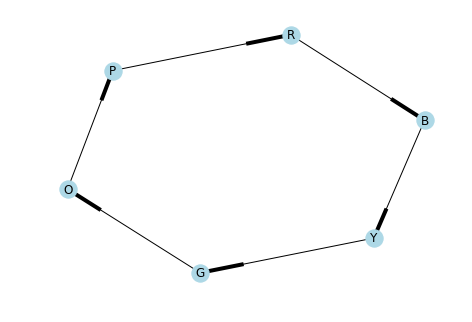

In [4]:
rules = {"R":"B", "B":"Y", "Y":"G", "G":"O", "O":"P", "P":"R"}
edges = zip(list(rules.keys()), list(rules.values()))
G = nx.DiGraph(data= edges)
nx.draw_spring(G, node_color="lightblue", with_labels=True);

*** 
> Example of another kind of law:

> $R \to B, B \to G, G \to R$  -- call this cycle "+1 energy"

> $Y \to O, O \to P, P \to Y$  -- call this cycle "-1 energy"

> If start in the upper cycle (R, B, or G), there is a $1/3$ probability of each of these states, with $0$ probability of (Y, O, or P)

> $P(+1) \frac13 = P(R, B, G)$

> $P(-1) \frac13 = P(Y, O, P)$

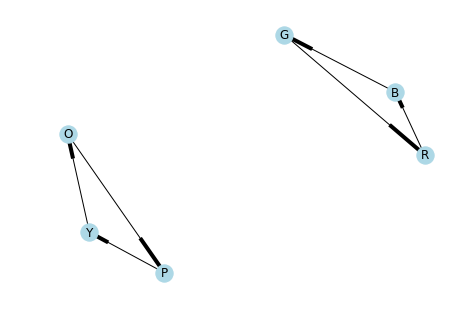

In [5]:
rules = {"R":"B", "B":"G", "G":"R", "Y":"O", "O":"P", "P":"Y"}
edges = zip(list(rules.keys()), list(rules.values()))
G = nx.DiGraph(data= edges)
nx.draw_spring(G, node_color="lightblue", with_labels=True);

start node  G
end node  R


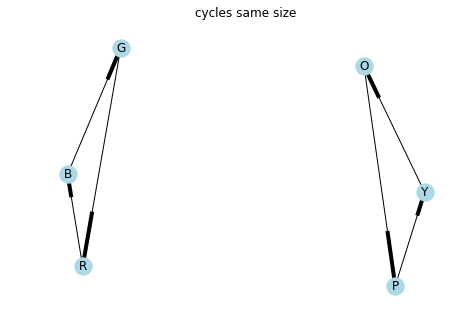

In [6]:
# start somewhere randomly, and step number_of_steps

number_of_steps = np.random.randint(10)

start = np.random.choice(list(rules.keys()), size=1)[0]
print("start node ", start)
tempnode = start

for step in range(number_of_steps):
    tempnode = G.successors(tempnode)[0]
    tempnode
    
endnode = tempnode

print("end node ", endnode)

nx.draw_spring(G, node_color="lightblue", with_labels=True);
plt.title("cycles same size");

## Conservation Law

The configuration space divides up into **cycles**.

Cycle don't have to have same size.

> E.g.  
> $R \to B \to G \to P \to R$, 

> $Y \to O \to Y$

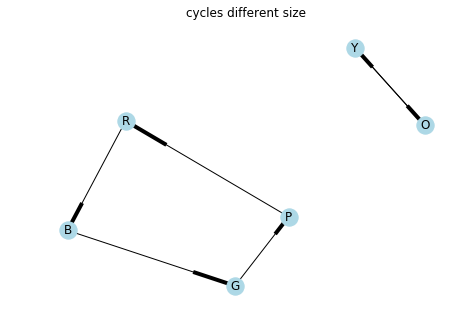

In [7]:
rules = {"R":"B", "B":"G", "G":"P", "P":"R", "Y":"O", "O":"Y"}
edges = zip(list(rules.keys()), list(rules.values()))
G = nx.DiGraph(data= edges)
nx.draw_spring(G, node_color="lightblue", with_labels=True);
plt.title("cycles different size");

![closed_system](./images/closed_system.png)

One closed system, energy is conserved.

![closed_system](./images/two_closed_systems.png)

Two closed systems, energy is conserved within each system.  Therefore there are **two conserved quantities**.

![two_connected_systems](./images/two_connected_systems.png)

Two connected systems, energy is conserved between the two.  **One conserved quantity**.

Can ask, "What is the probability that the energy in system A is X?"  Given some global information.

### "bad laws" - violate the **conservation of information** (the most basic rule of physics)
### "-1st law of physics"

Rule that you can 'keep track' of going forward and backward.

> $R \to R$

> $B \to R, Y \to R, P \to R, G \to R, O \to R$

> Is not **reversible**

> "bad" because loses track of where you started.

> not allowed in classical or quantum physics

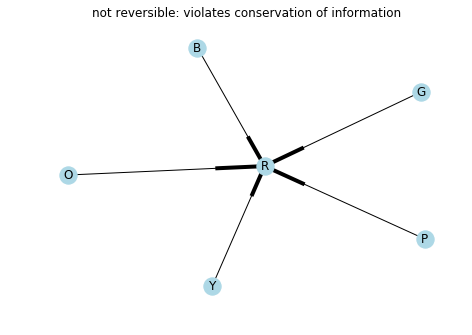

In [8]:
rules = {"R":"R", "B":"R", "G":"R", "P":"R", "Y":"R", "O":"R"}
edges = zip(list(rules.keys()), list(rules.values()))
G = nx.DiGraph(data= edges)
nx.draw_spring(G, node_color="lightblue", with_labels=True);
plt.title("not reversible: violates conservation of information");

### Called "Liouville's Theorem"  (classical mechanics version of '-1st law')

> **Friction** *seems* like a case of Liouville's Theorem, since wherever you start, you come to rest.

> (similar to the above case that wherever you start, you go to R)

> Actually, since kinetic energy is converted to heat in the surrounding molecules, the distinction between starting points *is recorded*.

>Differential equation of friction:

>$$
\frac{d^2 x_n}{dt^2} = -\gamma \frac{dx_n}{dt}
$$

>Very deterministic, and every particle comes to rest.

>Something wrong from the point of view of conservation of energy, and thermodynamics.
Says "things get simpler".

suppose we have a collection of $N$ possible states

and we have "occupied" $M < N$ states, equaly probable, where $p = 1/M$, and $p = 0$ for all others.

By **Liouville's theorem**, the number of "occupied" states that have non-zero probability will remain constant ($M$), and the probabilities will remain $1/M$.

$M$ is characterizing **ignorance (or uncertainty)**.  If $M = N$ we have maximal ignorance.


>**"Entropy increases because our ignorance increases, not because anything has happened in the system.  If we could follow (the details of the system), we would find that it would be conserved."**

### Entropy - approximately measures the number of states that have a non-zero probability

$S = \log M$    

(here in the uniform distribution case)

The maximum value of $S = \log N$. (log of the system size)

**Maximum entropy** is a notion of how many states there are all together.


Entropy depends on two things:  
1. the system
2. your *state of knowledge* about the system

### Phase space of a system - "occupied space" of positions and momenta of each particle:

![Liouville's Theorem](./images/liouville_theorem.png)

Basically, the state is position and velocity.

If there are $10^{23}$ particles, there would be $10^{23}$ P axes, and $10^{23}$ V axes.

Think of the occuped patch as a fluid that changes over time (and keeps the same volume).

### Liouville's Theorem: 

#### Volume of occupied phase space must remain the same.
####                                    and if you start with a uniform probability distribution at start time, the probability distribution will be uniform in the new occupied space

>  I.e.  If the occupied space is squeezed in one direction, it must expand in the other.

>  Example, when sliding an eraser across the desk, the eraser stops.  It appears at first that this violates Liouville's theorem, since the momentum has all gone to 0.   However, the molecules on the table surface are part of the system and have heated up, meaning that their position and momentum have both expanded due to heat.  Therefore, the compressed volume of the eraser's occupied phase space has transferred to the volume of the occupied phase space of the table-top molecules.

>![friction_liouville](./images/friction_liouville.png)

> **back to friction**: if we consider the eraser coming to a stop due to friction, it *seems* that the phase space of the particles in the eraser is collapsing down to zero volume along the 1-dimensional x-axis.

> What is really happening is that the phase space is changing shape and being spread 'thin' among the particles on the table surface, and this is happening in high dimensions (of P), since there are many particles.


## Zeroth law of thermodynamics - "~Transitive property of thermal equilibrium."

If A is in thermal equilibrium with B, and B is in thermal equilibrium with C,

then A is in thermal equilibrium with C

(skip for now)


## First law of thermodynamics:
## Energy Conservation (for a closed system)

$$
\frac{dE}{dt} = 0
$$

![two_connected_systems](./images/two_connected_systems.png)

If a system is made of two parts (1,2) with a link between them, then

$$
\frac{dE_1}{dt} + \frac{dE_2}{dt} = 0 \implies \frac{dE_1}{dt} = - \frac{dE_2}{dt}
$$

Roughly, energy is the sum of the energy of the two, plus a small amount for their interactions.

> Note, in some systems, you can't just add up all the parts to get the energy, since there may be a potential energy as a result of the two parts interacting.  However, often the energy of interactions is negligible in comparison with the energy of each part. 

>(basically, because surface area is small compared to volume)

### Entropy (continued)

![M_elements_uniform](./images/M_elements_uniform.png)

In this simple uniform case (above), we have defined entropy to be $\log M$.

![non_uniform_entropy](./images/non_uniform_entropy.png)

Using our new definition:  
$$
S = - \sum p(i) \log_2 p(i),
$$ 

for this uniform case of M elements we get:

$$
S = - M \sum \frac1M \log_2 \frac1M  = - \log \frac1m = - (- \log M)  = \log M
$$.


***

>  Example, flip $n$ coins 

>  Total number of states is $N = 2^n (= M)$

> Similar to the uniform M elements example above, we just take the logarithm of N

> $ S = \log 2^n = n \log 2$

In [9]:
n = 10 
N = 2 ** n
N

S = np.log2(N)
S

1024

10.0

In [10]:
# Let's verify from the equation above:

- N * np.sum(1/N * np.log2(1/N))

10.0

### More on Entropy

* **Entropy is _proportional_ to the number of degrees of freedom $n$.**  (see the width of the uniform distribution above)

  (Example, if we think of a robot arm with one 'elbow' that can only fold, it cannot surprise us with ununusual poses, but if we think of a complex robot with many joints, it can strike interesting and unusual poses.  This robot will tend to have higher entropy.)

* a low probability event has a high "surprise" when it occurs


* the log of the probability of each event can therefore be thought of as "the amount of surprise" for that event occuring.  This is called **information gain** from that event.


* we can also think of entropy as the **expected number of bits** to describe a distribution, since **$\log_2(p)$ tells us the number of bits** to express $p$, 
and **$p *$ a value is the expectation of that value**.  We put these together by writing $p \log_2 p$, the expected value of the number of bits.


* Notice that $p$ and $- \log p$ are in conflict when contributing to entropy.  As $\lim_{p \to 0} -\log p = \infty$.

  We can use L'Hopital's Rule to understand this weighted information gain:
  
  $$
  p * - \log p
  $$
  
  $$
  = \frac{- \log p}{1/p}
  $$
  

  $$
  \lim_{p \to 0} \frac{- \log p}{1/p}
  $$
  
  $$
= \lim_{p \to 0} \frac{\frac d{dp}  - \log p}{\frac d{dp}  1/p}   \space{         } \text{       (l'Hopital)}
  $$
  
  $$
= \lim_{p \to 0} \frac{\frac d{dp}  - \log p}{\frac d{dp}  p^{-1}}
  $$
  
  

$$
= \lim_{p \to 0} \frac{- 1/p}{-1 p ^{-2}}
$$

$$
= \lim_{p \to 0} \frac{p^2}{p} 
$$

$$
= \lim_{p \to 0} p
$$

$$
= 0
$$

#### Hmm, but what about $\lim_{p \to \infty} p$ ?  This should go to $\infty$ , but it doesn't according to the plot below.  Why not?

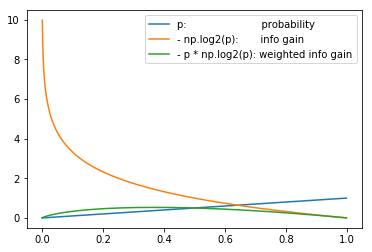

In [11]:
# demonstrate that weighted information gain does indeed go to 0 as p -> 0

p = np.arange(0,1,.001)
plt.figure()
plt.plot(p, p, label = 'p:                        probability')
plt.plot(p, - np.log2(p), label = '- np.log2(p):       info gain');
plt.plot(p, - p * np.log2(p), label = '- p * np.log2(p): weighted info gain')
plt.legend();
plt.show();

***

> Note that if the system can only take on one state, then we have

> $S = \sum 1 \log 1 = 0$

> ### "The more you know, the less the entropy"

**Note, if we asked "what is the entropy if one coin is heads?", that is just equal to the degrees of freedom, $n$, since there are $n$ ways one coin can be heads.**

### Entropy of a more complicated (and less random) distribution from coin flipping:

Find the probability of the number of heads by flipping 10 coins 10000 times:

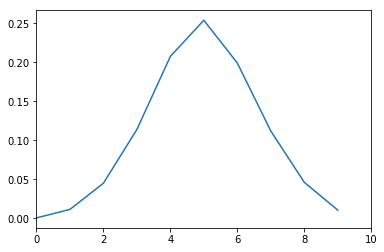

In [12]:
i = ["H", "T"]

ps = []

for x in range(10000):
    flips = list(np.random.choice(a = i, size=n))
    num_heads = flips.count("H")
    ps.append(num_heads)

h = np.histogram(ps, density=True)
p = h[0]
plt.plot(p);
plt.xlim([0,10]);

In [13]:
# calculate the Shannon entropy
S = - np.sum(p * np.log2(p))
S

2.7032212790393992

**Here we know more than the uniform distribution, so entropy is less.**

## In continuous systems, the entropy is the log of the volume in phase space

![entropy_of_phase_space](./images/entropy_of_phase_space.png)


$S = \log V_{ph}$

Occupied states: $\int P(p, x) = 1$

$$
S = - \int  dp dx P(p, x) \log P(p, x)
$$

# Lecture 2 - Boltzmann Constant and Temperature

## Boltzmann constant (a conversion factor)

Can convert between "human units" to more fundamental units.

**Temperature is really an energy.**  Measuring kinetic energy.

Natural units for temperature is energy.  But human units for temperature were created before it was realized that temperature is an 'energy'.

$E = \frac32 k_B t_k$,

Factor of 3 comes from dimension.

$k_B$ is the Boltzmann constant ($1.4 \times 10^{-23} \frac Jk $), and $t_k$ is the temperature in Kelvin.

$T = k_B t$ is a redefined unit of temperature that allows us to get rid of conversion to Boltzmann units in all other formulas.

$S_{carnot} $ is Carnot's entropy (units joules/kelvin) was a macroscopic measure used for steam engines.

Boltzmann's Entropy: $S = - \sum_i p_i \log p_i = \frac{1}{k_B} S_{carnot}$

Boltzmann's Entropy is proportional to the number of molecules in a system (since it scales with the degrees of freedom of a system.)

$i$ is the exact micro-scopic description of the system, labeled in ascending order of average energy.


Entropy becomes a function of average energy:

$S(E) = - \sum_i p(i,E) \log p(i,E)$  

Boltzmann entropy is dimensionless.

## Temperature

![system](./images/system.png)

System in heat bath.

Temperature is a rate of change between energy and entropy:
$$
T = \frac{dE}{dS}
$$

Sum of probabilities of states is 1:

$$
\sum p(i) = 1
$$

Average energy is
$$
\sum_i p(i) E(i) = <E>
$$



There is a one-parameter family of probability distribution for each value of $E$, each one having an average energy.

$$
P(i,E)
$$

![average_energy](./images/average_energy.png)


Each value of $E$ has an $S$

$$
S(E) = - \sum_i p(i,E) \log p(i,E)
$$

$S$ becomes a function of the energy, since for each energy we have a different probabilty dstribution.

## How much do you have to change the average energy to change the entropy by one bit $(\log_2)$?

$$
\Delta E = \frac{\partial E}{\partial S} \Delta S = T \Delta S
$$

$$
\Delta S = \frac1{\partial E/\partial S} \Delta E = \frac{\partial S}{\partial E} \Delta E
$$

$$
 \frac1{\partial E/\partial S} = T
$$

$$
dE = T dS
$$

$$
= t_K dS_{carnot} \text{,         but Boltzmann factors cancel to give you above}
$$


# Temperature equals the rate of change of energy / entropy

## i.e.  when you increase the energy you spread the possible states over a wider distribution.

![aSystem composed of two parts](./images/System composed of two parts.png)

Two connected systems A and B at different temperatures, $T_A$ and $T_B$.

By 2nd Law of Thermodynamics, entropy increases.

$$
S = S_A + S_B
$$

Entropy is additive (due to logs).

1st law: $dE_A = - dE_B$  (Conservation of total energy.)

2nd law: $dS_A + dS_B >0$  (Entropy increases) 

**Definition of temperature:**

$dE_A = T_A dS_A$

$dE_B = T_B dS_B$

***

# Lecture 3 - Equilibrium and Temperature

The entropy of a probabilty distribution is the sum of the probabilties of states times the logaritm of the probabilities of the states:

$S = - \sum_i p_i \log p_i$

Each state has a probability:

$ p_i $, such that $\sum_i p_i = 1$

Energy of the ith state

$E_i$, such that $\sum_i p_i E_i  = <E>$, the average energy.


The ** ground state ** of a system is described by an energy distribution that is zero everywhere except the state of lowest energy.  At lowest energy the entropy is exactly zero.

As the average energy increases, the entropy increases.

**Entropy is a monotonically increasing function of energy.**

![average_energy](./images/average_energy.png)


## -1st law - information is conserved (Liouville's Theorem)

![0th_law](./images/0th_law.png)

## 0th law - thermal equilibrium is 'transitive'

> There is such a thing as thermal equilibrium.

> If the system is made of different parts, there is a concept called "temperature", such that energy flows from larger temperature to smaller temperature when the system is not in equilibrium.  When the temperatures are equal, the heat stops flowing.  if A is in equilibrium with B, and B in equilibrium with C, then A is in equilibrium with C.  Can say the same with temperature.  if A same temp as B, and B same temp as C, then A same temp as C.

>* Temperature flows from higher to lower
>* Thermal equilibrium occurs when all parts of system are the same.
    
    
> Can also think of temperature as telling you which way energy flows.

## 1st law - energy is conserved

## 2nd law of thermodynamics - entropy increases over time

> means that, if you have a system described by a given probability distribution, and is ** not in equilibrium **, as it comes to equilibrium the distribution broadens.

> if talking about a complex system with many degrees of freedom, you tend to "lose track of things" = more uncertainty = more entropy


From last lecture, 

$$
T = \frac{dE}{dS}
$$

## Now let's look at a simple system made of two parts to understand equilibrium and temperature.

![aSystem composed of two parts](./images/System composed of two parts.png)

Assume: $T_B > T_A$

Let's write what we know and see what we get:

1. $dE_A + dE_B = 0 $  (1st law, conservation of energy: total energy doesn't change.)

2. $dS_A + dS_B > 0$  (2nd Law, Entropy increases as the system moves toward equilibrium.)
> The probability distribution of the combined systems shifts in such a way that the distribution becomes broader.

3. $dE = T dS$ (0th law)
> $dE_A = T_A dS_A$
and
> $dE_B = T_B dS_B$

Using (3.), can rewrite (1.) as:

$T_A dS_A +  T_B dS_B = 0$

Solving for $dS_B$, we get

$dS_B = - \frac{T_A}{T_B}dS_A$

Replacing in (2.), we get

$ dS_A - \frac{T_A}{T_B}dS_A > 0  \implies$

(multiply by $T_B$, assuming temperatures are positive)

$ T_B dS_A - T_A dS_A > 0  \implies$

$ (T_B - T_A) dS_A > 0$   (A positive number (since $T_B > T_A$) times a positive number is positive.)

$ \implies dS_A > 0 \implies$ 

$ T_A dS_A > 0 \implies $ (since $T_A$ is positive)

$ dE_A > 0 \implies$  (by 3. above)

$ dE_B < 0$  (by 1. above)

That is, A increases in energy and B decreases.  i.e. energy flows from B to A. $\square$

**The definition of temperature (equation 3:  $dE = T dS$) is such that energy (heat) flows from B to A until the temperatures become the same, when equilibrium is established.  This is the 0th Law of Thermodynamics.**


** In equilibrium, what is the probability distribution for the system to be in its different micro-states? **

** In other words, for a system to be at a certain average energy, what is the possible distribution of energy levels of its subsystems? **
 

## System of many parts

![aSystem composed of many parts](./images/System composed of many parts.png)

Each of the identical systems is in a possible state.  Each state has different energy:

![apossible states](./images/possible states.png)

$n_i$ is the number of systems in state (energy) $i$ ($n_i$s are also called "occupation numbers")

$$
n_i = (n_1, n_2, n_3, ...)
$$

$p(i) = \frac{n_i}{N} \implies N p(i) = n_i$  :  The number of systems in that state / total number of systems.

## How many ways are there of redistributing the systems among the states for a given number of $n_i$s (occupied states)?

There are two **constraints:** 

1. $n_1 + n_2 + n_3... = \sum_i n_i = N$      ( **The total number of systems is fixed.**)

    $\implies \sum_i p(i) N = N $   (by definition of $n_i$ above)
    
    $\implies \sum p(i) = 1$

2. Energy constraint: **The total energy is fixed.**

    $n_1 E_1 + n_2 E_2 + ... = \sum n_i E_i  = N E$
    
    $\implies \sum p(i) N E_i = NE$  (by definition of $n_i$ above)
    
    $\implies \sum p(i) E_i = E $ (average energy)
    
    The total energy is proportional to the number of systems.
    
What is the probability that a given one of these systems is in the ith state?


   
If N is finite, how many arrangements (number of ways) of keeping occupation numbers fixed but re-distributing the systems among the occupied energy levels (states)?

Number of arrangements = $ \frac{N!}{n_1! n_2! n_3! ...} = \frac{N!}{\prod_i n_i!}$

> This is the number of ways of arranging $N$ systems divided by the number of ways of arranging each of the occupation numbers of systems.

What about unoccupied states?  $0! = 1$, so no problem.

When $N$ gets very large, the occupation numbers cluster about a particular set of occupation numbers.  The distribution gets peaked.

>This is similar to n choose k, as we see elsewhere in probability with the **Binomial Theorem**.

>That is, if we have N systems and want to allocate them in k states.

>Suppose we have 6 systems and want to allocate them in 2 states.

>Then, for the first state, we have 6 ways of choosing it, and for the 2nd state, we have 5 ways of choosing it.

> This is 
$$
\frac{6!}{4!} = 6 * 5
$$

> So, generally if we have $N$ things and want to choose from them $k$ items, we have 

## Approximating factorial with Stirling's Approximation

> $N! \approx N^N e^{-N} = (\frac{N}{e}) ^N $

> $N! = 1 \times 2 \times ... \times N$

> $\log N! = \log 1 + \log 2 + ... + \log N$

> $\log N! = \sum_{x=1}^N \log x$

> Approximate $\sum \log x$ by $\int \log x$  (see figure)

> $\approx \int_1^N dx \log x$

> ![astirling_approx](./images/stirling_approx.gif)

> To integrate, try taking the derivative of a guess at the integral.

> $\frac{d}{dx}x \log x - x = \log x + 1 -1 = \log x \implies$


> $\log N! \approx \int_1^N dx \log x = N \log N - N \implies$

> $N! \approx e^{N\log N} e^{-N}$

> Since $e^{N \log N} = e^{\log N^N} = N^N$, 

> $N!= N^N e^{-N}$

## Maximizing Number of arrangements = $ \frac{N!}{n_1! n_2! n_3! ...} = \frac{N!}{\prod_i n_i!}$

**Given two constraints:**

1. $\sum n_i = N$
2. $\sum n_i E_i = E$

**What is the set of occupation numbers ($n_i$s) that makes the number of arrangements as large as possible?**

Once we know the occupation numbers we know the probabilities.

### How maximize?  Differentiate. However, maximizing is the same as maximizing its logarithm.

Use Stirling's approximation:

$$
C= \frac{N!}{\prod_i n_i!} \approx \frac{N^N e^{-N}}{n_1^{n_1}n_2^{n_2}n_3^{n_3}... e^{-n_1-n_2-n_3}...}
$$

> (Since $\sum_i n_i = N$, cancel the $e^{n_i}$ terms with $e^N$)

$ C = \frac{N^N}{n_1^{n_1}n_2^{n_2}n_3^{n_3}}...$

> (take logarithm)

$ \implies \log C = N \log N - \sum_i n_i \log n_i$  (right-hand side looks like **entropy**)

> but since $N p(i) = n_i$


$\implies N \log N - \sum_i p(i)N \log p(i) N $

$= N \log N - \sum_i p(i)N (\log p(i) + \log N) $

> but - $\sum_i p(i) N \log N  = - N \log N \times 1 = - N \log N $, which cancels the $N \log N $ term.

$=   - \sum_i   p(i) N \log p(i)$

$=   - N \sum_i p(i) \log p(i)$ (**N times the entropy!**)

### $N$ fixed, so to maximize the number of system arrangements, 

### just need to maximize the entropy. (subject to constraints)

## Find p(i) that maximizes $- N \sum_i p(i) \log p(i)$ subject to constraints

1.  $\sum p_i = 1$
2.  $\sum p_i E_i = E$   (this constraint breaks the symmetry between different states - some have big energy, some have small energy)


## Lagrange multipliers for maximization subject to constraints

Given an abstract function $F(x_i)$, maximize $F$.

Just solve the partial derivatives at 0.

$\frac{\partial F}{\partial x_1} = 0$

$\frac{\partial F}{\partial x_2} = 0$

...

ok, what about constraints?

![aContours](./images/Contours.jpg)

Minimum or maximum always surrounded by circles.

Contours are the level surfaces of $F$. (isolines)

but have constraint that $G(x_i) = 0$.

Along the curve $G(x) = 0$, where is $F$ maximum?

Will always be somewhere that a level surface of $F$ is **tangent** to $G$.


   <tr>
    <td> <img src="./images/Contours2.jpg" alt="Drawing" style="width: 250px;"/> </td>
    <td>  Here F is a cross-section of the gradient at the tangent<img src="./images/F vs G langrange.png" alt="Drawing" style="width: 250px;"/> </td>
    </tr>

Shift $F$ by a value proportional to $G$:  $F' = F + \lambda G$, so that $F'$ is minimized at $G = 0$

![aF vs G langrange](./images/F vs G langrange 2.png)

## Lagrange multiplier example 1

**1. Find function to minimize, $F$:**

$$
    F = \frac{x^2 + y^2}{2}
$$

> subject to constraint $x + y = 1$
    

**2. That is, setup G constraint function such that $G = 0$:**

$$
    G = x + y - 1 = 0
$$


**     $F$ looks something like this, with constraint $G = 0$:**

![aF vs G langrange](./images/circle_contours.gif)


** 3. Set up the Lagrange multiplier by defining a new function $F' = F + \lambda G$:**

> (This is the shifted $F$ that is minimized by adding some scaling of $G$)

$$
    F' = F + \lambda G = \frac{x^2 + y^2}{2} + \lambda (x + y - 1)
$$

** 4. Minimize $F'$ with respect to $x$ and $y$**

$$
\frac{\partial F'}{\partial x} = 0, \frac{\partial F'}{\partial y} = 0
$$

> In our case set the derivatives with respect to $x$ and $y$ equal to zero,

$$
\frac{\partial F'}{\partial x} = x + \lambda = 0,
$$

    and 

$$
 \frac{\partial F'}{\partial y} = y + \lambda = 0.
$$

$$
\implies
$$

$$
x = -\lambda, 
$$ 

$$
y = -\lambda.
$$

** 5. Include the constraint that $G = 0$ **

$$
G = x + y - 1 = 0
$$

or

$$
x + y = 1.
$$

$$
\implies - 2 \lambda = 1
$$

$$
\implies \lambda = -\frac12
$$


I.e. 
$$ 
x = y = +\frac12
$$

is the point that minimizes $ F = \frac{x^2 + y^2}{2}$ subject to the constraint that $x + y = 1$.

![aF vs G langrange](./images/circle_contours_2.png)


## Lagrange multiplier example 2 - with several constraints

$ G_1 = 0, G_2 = 0$

** 1. Define $F$ function to minimize:**

$$
F = \frac{x^2 + y^2 - z^2}{2}
$$

**     having constraints:**

$$
x + y = 1
$$

$$
z + x = 1
$$

** 2. set up constraint functions $G$:**

$    G_1 = x + y - 1 = 0$

$    G_2 = z + x - 1 = 0$

** 3. Set up the Lagrange multiplier by defining a new function **

$$
    F' = F + \lambda_1 G_1 + \lambda_2 G_2
$$

$$
    F' = \frac{x^2 + y^2 - z^2}{2} + \lambda_1 (x + y - 1) + \lambda_2 (z + x - 1)
$$


** 4. Minimize $F'$ with respect to $x, y, z$**


$$
\frac{\partial F'}{\partial x} = x + \lambda_1 x + \lambda_2 x = 0
$$

$$
\frac{\partial F'}{\partial y} = y + \lambda_1 y = 0
$$


$$
\frac{\partial F'}{\partial z} = -z + \lambda_2 z = 0
$$

** 5. Include the constraint that $G = 0$ **

$$    
G_1 = x + y - 1 = 0
$$

$$
G_2 = z + x - 1 = 0
$$

**Using $G$, solve for $x$, then $z$:**

$$
x = 1 - y
$$
$$
z = 1 - x = 1 - (1 - y) \implies
$$
$$
z = y
$$

** Now using the derivatives of $F'$: **

$y + \lambda_1 y = 0 \implies$

$(1 + \lambda_1)y = 0 \implies$

$1 + \lambda_1 = 0 \implies$

$\lambda_1 = -1$

which gives:

$x - x + \lambda_2 x = \lambda_2 x = 0 \implies$

$\lambda_2 = 0$

## Generally, if $F$ is a function of many variables, when trying to maximize the entropy subject to constraints (total electric charge is fixed, total energy is fixed, etc.)

$F$ is a function of the probabilities of occupying each state:

$F(p_1, p_2, ...) = S(p_i) = - \sum_i p(i) \log p(i)$  ($F$ is entropy)

The constraints are:

Total probabilities add up to one:

$G_1 = \sum_i p_i - 1 = 0$

Total energies add up to E:

$G_2 = \sum_i p_i E_i = E$


# Lecture 4 - Boltzmann Distribution

For our purposes, we will often want to **maximize the entropy for the two constraints:**

$F(p_i) = -S(p_i) =  \sum_i p_i \log p_i$ (negate S)

1. $\sum_i p_i = 1$
2. $\sum_i E_i p_i = E$

These give us:

1. $\sum_i p_i - 1 = 0$
2. $\sum_i E_i p_i - E = 0$

Given us a formulation:

$$
F' = F + \alpha[\sum_i p_i - 1] + \beta[\sum_i E_i p_i - E],
$$

where $\alpha$ and $\beta$ are our two Lagrange multipliers.

When we differentiate $F'$, the 1 and E constant terms will not contribute, so we can re-write $F'$ as

$$
F' = F + \alpha[\sum_i p_i] + \beta[\sum_i E_i p_i]
$$

$$
= \sum_i p_i \log p_i + \alpha[\sum_i p_i] + \beta[\sum_i E_i p_i]
$$

If, for example, we differentiate $F'$ with respect to $p_7$, chosen arbitrarily, we get:

$$
\frac{\partial F'}{\partial p_7} = \log p_7 + 1 + \alpha + \beta E_7.
$$

So, generally, if we chose some $p_i$, we obtain the derivative and set it to zero,

$$
\frac{\partial F'}{\partial p_i} = \log p_i + 1 + \alpha + \beta E_i = 0.
$$

This gives us that

$$
\log p_i = -(1 + \alpha) - \beta E_i.
$$

Exponentiating gives

$$
p_i = e^{-(1 + \alpha) - \beta E_i}
$$

> Note $e^{(1 + \alpha)} = z$ in statistical mechanics.

<p style="border: 1px solid black">
$$
p_i = \frac1z e^{-\beta E_i}
$$
</p>



This is the relative probabilities of the different states.

<IPython.core.display.Javascript object>


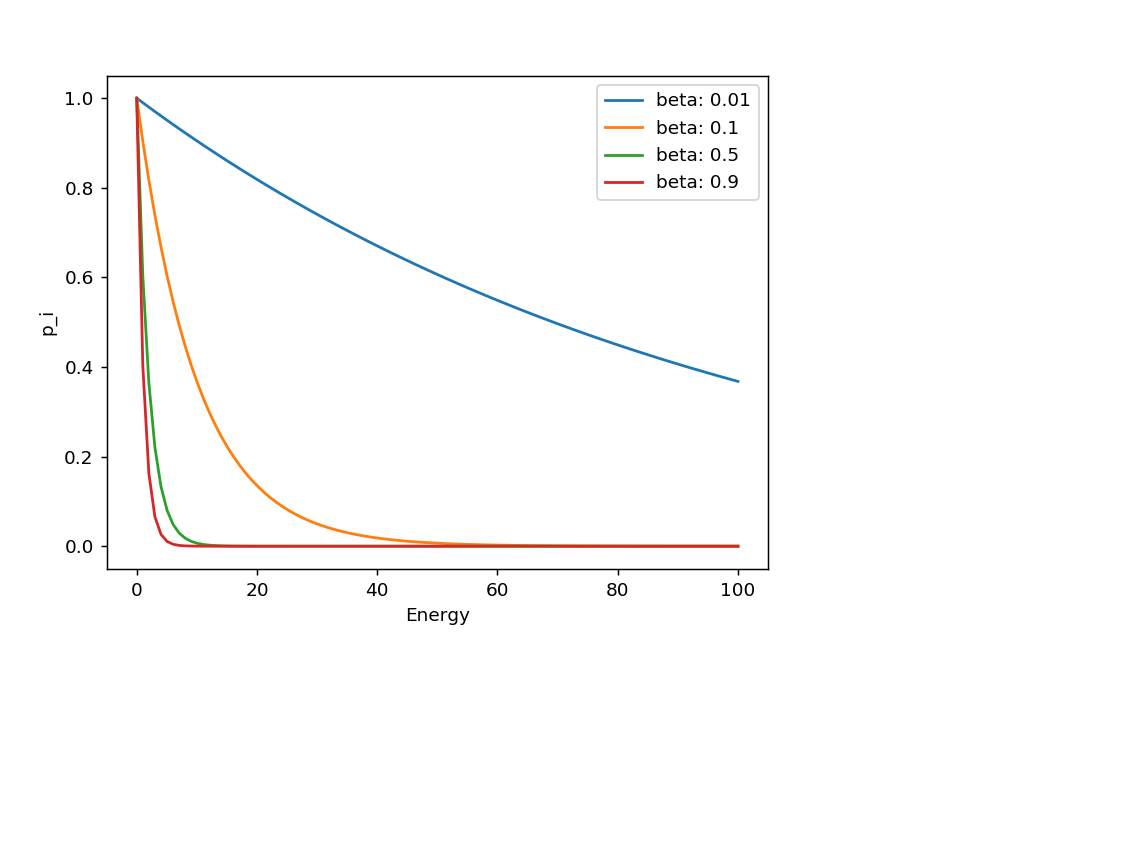

  beta    avg energy    entropy
  0.01 2634.296862103942 26.342968621039425
  0.1 98.86866292417308 9.886866292417308
  0.5 3.8768876977180815 1.9384438488590408
  0.9 1.14141458776212 1.027273128985908


In [7]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

E = np.linspace(0,100, 100)

betas = [.01, .1, .5, .9]

plt.figure()
plt.xlabel("Energy")
plt.ylabel("p_i")

print("  beta    avg energy    entropy")
for beta in betas:
    p_i = np.exp(-beta * E)
    plt.plot(E, p_i, label = 'beta: ' + str(beta));
    plt.legend();
    
    avg_energy = np.dot(p_i, E)
    entropy = - np.dot(p_i, np.log(p_i))
    print(" ",beta, avg_energy, entropy)


Note that the smaller $\beta$, the larger the average energy $E$.



$\beta$ **is the thing that you tune to change the average energy.**

> in fact, **beta is the inverse temperature**:  $\beta = \frac 1T$

** Rewriting constraint (1.) above, using $p_i = \frac1z e^{-\beta E_i}$**

$$
\frac1z \sum_i e^{-\beta E_i} = 1  \implies
$$

<p style="border: 1px solid black">
$$
z = \sum_i e^{-\beta E_i},
$$
</p> 

which we re-write as a function of $\beta$ (called the **partition function**)

$$
\sum_i e^{-\beta E_i} = z(\beta)
$$

** Rewriting constraint (2.) above, similarly, **

**3.**
$$
\sum_i E_i p_i = \sum_i \frac1z e^{-\beta E_i} E_i = E
$$

This is an equation relating $\beta$ to the average energy $E$.

Now, if we differentiate the partition function: $\sum_i e^{-\beta E_i} = z(\beta)$, we obtain

$$
\frac{\partial z}{\partial \beta} = - \sum_i E_i e^{-\beta E_i}
$$

Dividing by $z$ we get

$$
\frac1z \frac{\partial z}{\partial \beta} = - \frac{\sum_i E_i e^{-\beta E_i}}{z} (= E) 
$$


But this is the same as (3.) above!

**Therefore we have written the average energy as a function of derivative of the partition function.**

$$
E = - \frac1z \frac{\partial z}{\partial \beta} = \frac{\sum_i E_i e^{-\beta E_i}}{z}
$$

Thus

$$
E = - \frac1z \frac{\partial z}{\partial \beta}  = - \frac{\partial \log z}{\partial \beta}
$$

> (since $\frac{d}{dx} \log z = \frac1z$)

<p style="border: 1px solid black">
We now have a relation between $E$ and $\beta$:

$$
E(\beta) = \frac{- \partial \log z}{\partial \beta}
$$
</p> 

** Calculate Entropy as function of partition function $z$ **

$$
p_i = \frac1z e^{-\beta E_i}
$$

$$
S = -\sum_i p_i \log p_i
$$

$$
= -\sum_i \frac1z e^{-\beta E_i}[-\beta E_i - \log z]
$$

$$
= \sum_i \frac1z e^{-\beta E_i}[\beta E_i + \log z]
$$

$$
= \beta \sum_i p_i E_i + \frac1z \log z \sum_i e^{-\beta E_i}
$$

$$
= \beta E + \frac1z z \log z 
$$

$$
= S = \beta E + \log z
$$

<table style="border: 1px solid black">
<tr>
<td>
Entropy defined in terms of average energy and the partition function:

$$
S = \beta E + \log z
$$
</td>
</tr>
</table>

** Temperature: **

$$
dE = Tds
$$

$$
T = \frac{dE}{dS}
$$

also

$$
\frac1T = \frac{dS}{dE}
$$

Taking derivative of entropy ($S$):

** ?? understand derivative **
$$
dS = \beta dE + E d \beta + \frac{\partial \log z}{\partial \beta} d \beta 
$$

$$
= \beta dE + E d\beta - E d \beta
$$

$$
dS = \beta dE
$$

$$
\frac1\beta dS = dE
$$

<p style="border: 1px solid black">
$\beta$ is the **inverse temperature**:

$$
T = \frac1\beta
$$
</p> 

## important equations

<p style="border: 1px solid black">
$$
p_i = \frac1z e^{-\beta E_i}
$$

$$
z = \sum_i e^{-\beta E_i} \text{  or  } \int e^{-\beta E_i}
$$

$$
E = -\frac{\partial \log z}{\partial \beta}
$$

$$
T = \frac1\beta
$$

$$
S = \beta E + \log z
$$

</p> 


## Example - The Ideal Gas

Gas in a box:
![avolume](./images/volume.JPG)



assumption: molecules' interaction is negligible (0 interaction)

$N$ = number of particles

$V$ = volume

$\rho$ = Density = $\frac{N}{V}$ 

States are: the collection of position and momentum for all the particles

positions: $x_1, ... x_{3N}$

momenta: $p_1, ..., p_{3N}$

State is point in [x,p] (6-dimensional)

replaces sums by integrals

**find the partition function $z$**

$$
z = \int d^{3N}x d^{3N} p e^{-\beta E_i} 
$$


> kinetic energy = $\frac12 m v^2$

> assume all particles have same mass $m$

> $p$ = momentum = $mv$

> so the kinetic energy of each particle is $E_i = \frac1{2m}[m^2 v_1^2 + m^2v_2^2 + m^2v_3^2]  = \frac1{2m}[p_1^2 + p_2^2 + p_3^2]$

> Note that $p_1, p_2, p_3$ are the 3 momentum components in 3 directions of each particle, having the same mass $m$.
The $n$'s denote the coordinates.


$$
z =  \int d^{3N}x d^{3N} P e^{-\beta \sum_{n = 1}^{3N} \frac{P_n^2}{2m}}
$$


$$
=  \int d^{3N}x d^{3N} P e^{-\frac{\beta}{2m} \sum_{n = 1}^{3N} P_n^2}
$$

> (sum in the exponent = product)

$$
=  \int d^{3N}x d^{3N} P e^{-\frac{\beta}{2m}} \prod_{n = 1}^{3N} e^{P_n^2}
$$

> Note: This integral can be factored into $x$ and $P$ terms.  The $P$ terms look like: 

> $dp_1 e^{-\frac{\beta}{2m}p_1^2} dp_2 e^{-\frac{\beta}{2m}p_2^2} dp_2 e^{-\frac{\beta}{2m}p_2^2}$

> This is the integral over all possible states (all positions and momenta)

> The **$x$ integral gives the volume of the box:**

> $\int d^3 x = V$

> The integral over all the particles and $x$, $d^{3N}x$, gives $V^N$.

> common practice to divide by $N!$, and say we over-counted the ways of substituting particles for each other: $\frac{V^N}{N!}$




> ** The $P$ part gives **

$$
\big[\int dP e^{- \frac\beta{2m} P^2}\big]^{3N}
$$

Solving 
$$
\int dP e^{- \frac\beta{2m} P^2},$$ 

Let $q^2 = \frac{\beta}{2m} P^2$, giving

$P = \sqrt{\frac{2m}{\beta} }q $

$dP = \sqrt{\frac{2m}{\beta} }dq$, giving

$$
\sqrt{\frac{2m}{\beta}} \int dq e^{-q^2}
$$

> This integral happens to equal $\sqrt\pi$

>  https://en.wikipedia.org/wiki/Gaussian_integral

$$
= \sqrt{\frac{2m \pi}{\beta}}
$$

$$
z = \frac{V^N}{N!} \big(\frac{2m \pi}{\beta}\big)^{\frac{3N}{2}}
$$
 

Using Stirling's approximation, we get

$$
\frac{V^N}{N!} = \frac{V^N}{N^N e^{-N}} = \big( \frac{eV}{N}\big) ^N = \big(\frac e\rho\big)^N, 
$$

> since $\rho = \frac NV$, giving

<p style="border: 1px solid black">
** the partition function:**
$$
z = \big(\frac{2m \pi}{\beta}\big)^{\frac{3N}{2}} \big(\frac e\rho\big)^N
$$
</p>

useful to find the logarithm of $z$:

$$
\log z = N \big[ \frac32 \log \frac{2m\pi}\beta + \log e - \log \rho \big]
$$

$$
N \big[ \frac32 \log \frac{2m\pi}\beta - \log \rho + 1\big]
$$

>  our goal is to maximize $z$, so we can get rid of constant terms for the derivative

$$
\approx -\frac{3N}2 \log \beta + \text{const}
$$

>  the 3 comes from the 3 dimensions of space

>  the 1/2 comes from the change of variables $p \to q$


## Now, let's calculate the total energy of the system

Since

$$
E = -\frac{\partial \log z}{\partial \beta},
$$

and

$$
\beta = \frac1T,
$$

$$
\frac{\partial \log z}{\partial \beta} = -\frac{3N}{2}T,
$$

<p style="border: 1px solid black">

Therefore, the ** total energy is**

$$
E = - \frac{\partial \log z}{\partial \beta} = \frac{3N}{2}T.
$$

The energy per particle:

$$
\frac EN = \frac32 T
$$
</p>

To convert from theoretical energy units to "laboratory units", multiply by the Boltzmann constant:

$$
\frac EN = \frac32 Tk_B
$$

> This is for all 3 directions in space.  

> For each direction in space, the energy is 

$$
\frac EN = \frac12 Tk_B
$$


## Aside:  sharply peaked Gaussian

$$
g \approx 2^N e^\frac{− 2 n^2}{N}
$$

In [15]:
N = 6.0 * 10**2

n = np.linspace(-1000,1000)

g = (2 **N) * np.exp((-2 * n ** 2)/(N))

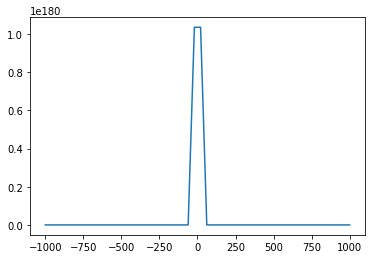

In [16]:
plt.plot(n, g);
#plt.ylim([0,1])
#plt.xlim([-1000,1000])